## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train[5].shape

(28, 28)

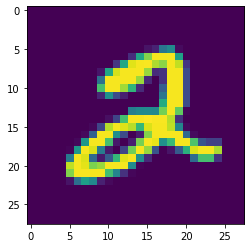

In [7]:
#It is white and black originally. 
#However, due to matplotlib's default setting, it seems colorful.
plt.imshow(X_train[5]);
# plt.matshow(X_train[5]);

In [8]:
# plt.imshow(X_train[5], cmap=plt.get_cmap('gray'));

In [9]:
y_train[7]

3

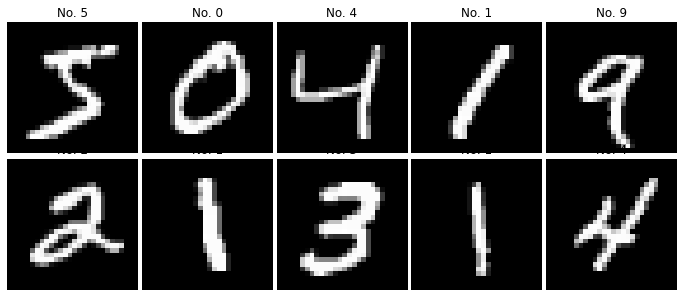

In [10]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [11]:
X_train[10].min()

0

In [12]:
X_train[5].max()

255

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
X_train[5].min()

0.0

In [15]:
X_train[5].max()

1.0

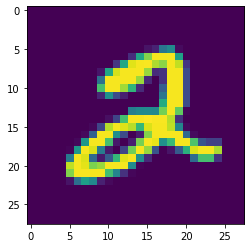

In [16]:
plt.imshow(X_train[5]);

In [17]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
#X_train.shape[0],28, 28, 1 deneme yaptık.

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
from tensorflow.keras.utils import to_categorical  # cat çevirelim  10 class var 0-9

In [22]:
Y_train = to_categorical(y_train, 10) # 10 verilmeli dummyden dolayı
Y_test = to_categorical(y_test, 10)
Y_test.shape  # 10000 satır 10 satır oldu dummyden dolayı

(10000, 10)

In [23]:
Y_train.shape

(60000, 10)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

#kernel_size = filter_size
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
# modeli add ile ekledik

#Stride for pooling is2 and for convolsion 1
model.add(MaxPool2D(pool_size=(2, 2)))

#Flatten converts mour matrices into vector
model.add(Flatten())
# modele girmeye hazır

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))  # output katmanı binary sigmoid ama burda softmax

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)  # epoch 10 olunca patience 2 yaptık.
# erken durdur                val_los u görünüle sabır sayısı 2 olsun

In [29]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])
#  validation_data=(X_test,Y_test) test datasının tamamı verildi, calbackearly olunca yazdık

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1508 - accuracy: 0.9550 - val_loss: 0.0636 - val_accuracy: 0.9784
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.0578 - val_accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0468 - val_accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0474 - val_accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0479 - val_accuracy: 0.9852


In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
model.history.history

{'loss': [0.1508045196533203,
  0.050164636224508286,
  0.030753936618566513,
  0.020263662561774254,
  0.014348337426781654],
 'accuracy': [0.9550166726112366,
  0.9851333498954773,
  0.9904166460037231,
  0.993483304977417,
  0.995283305644989],
 'val_loss': [0.06362545490264893,
  0.0577540285885334,
  0.04680165275931358,
  0.04743035137653351,
  0.047881003469228745],
 'val_accuracy': [0.9783999919891357,
  0.9807999730110168,
  0.9846000075340271,
  0.9853000044822693,
  0.9851999878883362]}

In [32]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.150805,0.955017,0.063625,0.9784
1,0.050165,0.985133,0.057754,0.9808
2,0.030754,0.990417,0.046802,0.9846
3,0.020264,0.993483,0.047430,0.9853
4,0.014348,0.995283,0.047881,0.9852


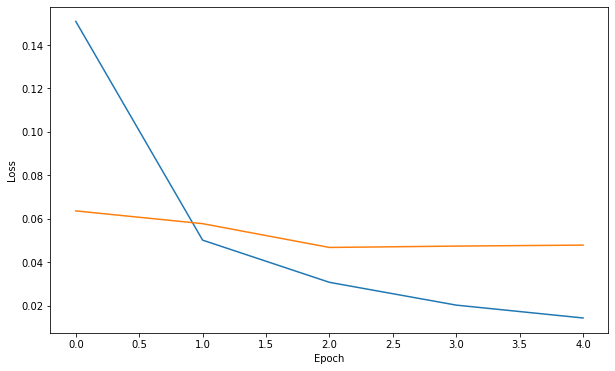

In [33]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch");

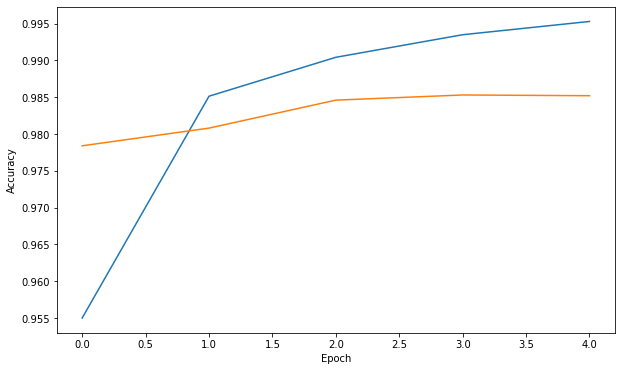

In [34]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch");

In [35]:
print(model.evaluate(X_test,Y_test,verbose=1))  # ilki loss ikincisi accuary

313/313 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9852
[0.047881003469228745, 0.9851999878883362]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
# probabilities of each class
preds = model.predict(X_test)

In [38]:
# The numpy.argmax() function returns indices of the max element of the array 
# in a particular axis.
predictions= np.argmax(preds, axis=1)

In [39]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [41]:
print(confusion_matrix(y_test, predictions))

[[ 971    0    4    0    0    0    2    2    1    0]
 [   0 1130    3    1    0    0    1    0    0    0]
 [   0    2 1016    1    1    0    0    7    4    1]
 [   0    1    2  997    0    4    0    1    5    0]
 [   0    0    0    0  955    0    2    0    4   21]
 [   1    0    0    9    0  876    4    0    2    0]
 [   5    2    0    0    1    1  945    0    4    0]
 [   0    3    9    0    0    0    0 1011    3    2]
 [   2    0    3    0    0    0    1    3  961    4]
 [   1    2    0    3    3    1    0    8    1  990]]


In [42]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.047881003469228745
Test accuracy: 0.9851999878883362


In [43]:
my_number = X_test[0]

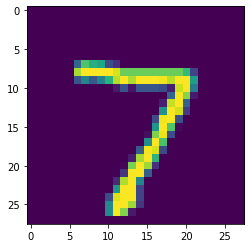

In [44]:
plt.imshow(my_number.reshape(28,28));

In [45]:
# 1 pic, 28x28, black&white
model.predict(my_number.reshape(1,28,28,1))

array([[6.8313808e-09, 2.2273429e-08, 9.0797618e-09, 2.0218549e-06,
        8.1795430e-12, 8.7911922e-10, 2.3360274e-14, 9.9999785e-01,
        7.6381028e-08, 9.4104323e-08]], dtype=float32)

In [46]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7], dtype=int64)

In [47]:
model.save("cnn-1.h5")